## VGGNet implementation with keras and CIFAR10 dataset

### 1. Load CIFAR10 Dataset

CIFAR10 is one of the most famous datasets in the field of machine learning
 - It has 60,000 images
 - Very straight forward to download
 - Images dimensions are 32x32
 - Colour images
 - 10 classes

In [3]:
from tensorflow.keras.datasets import cifar10
import cv2
import numpy as np

def load_cifar10_data(img_rows, img_cols):
    
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    #images resize
    x_train = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_train])
    x_test = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_test])

    #data normalization
    mean = np.mean(x_train)
    std = np.std(x_train)

    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_cifar10_data(224, 224)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### 2. Data Visualization

/home/angelo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for

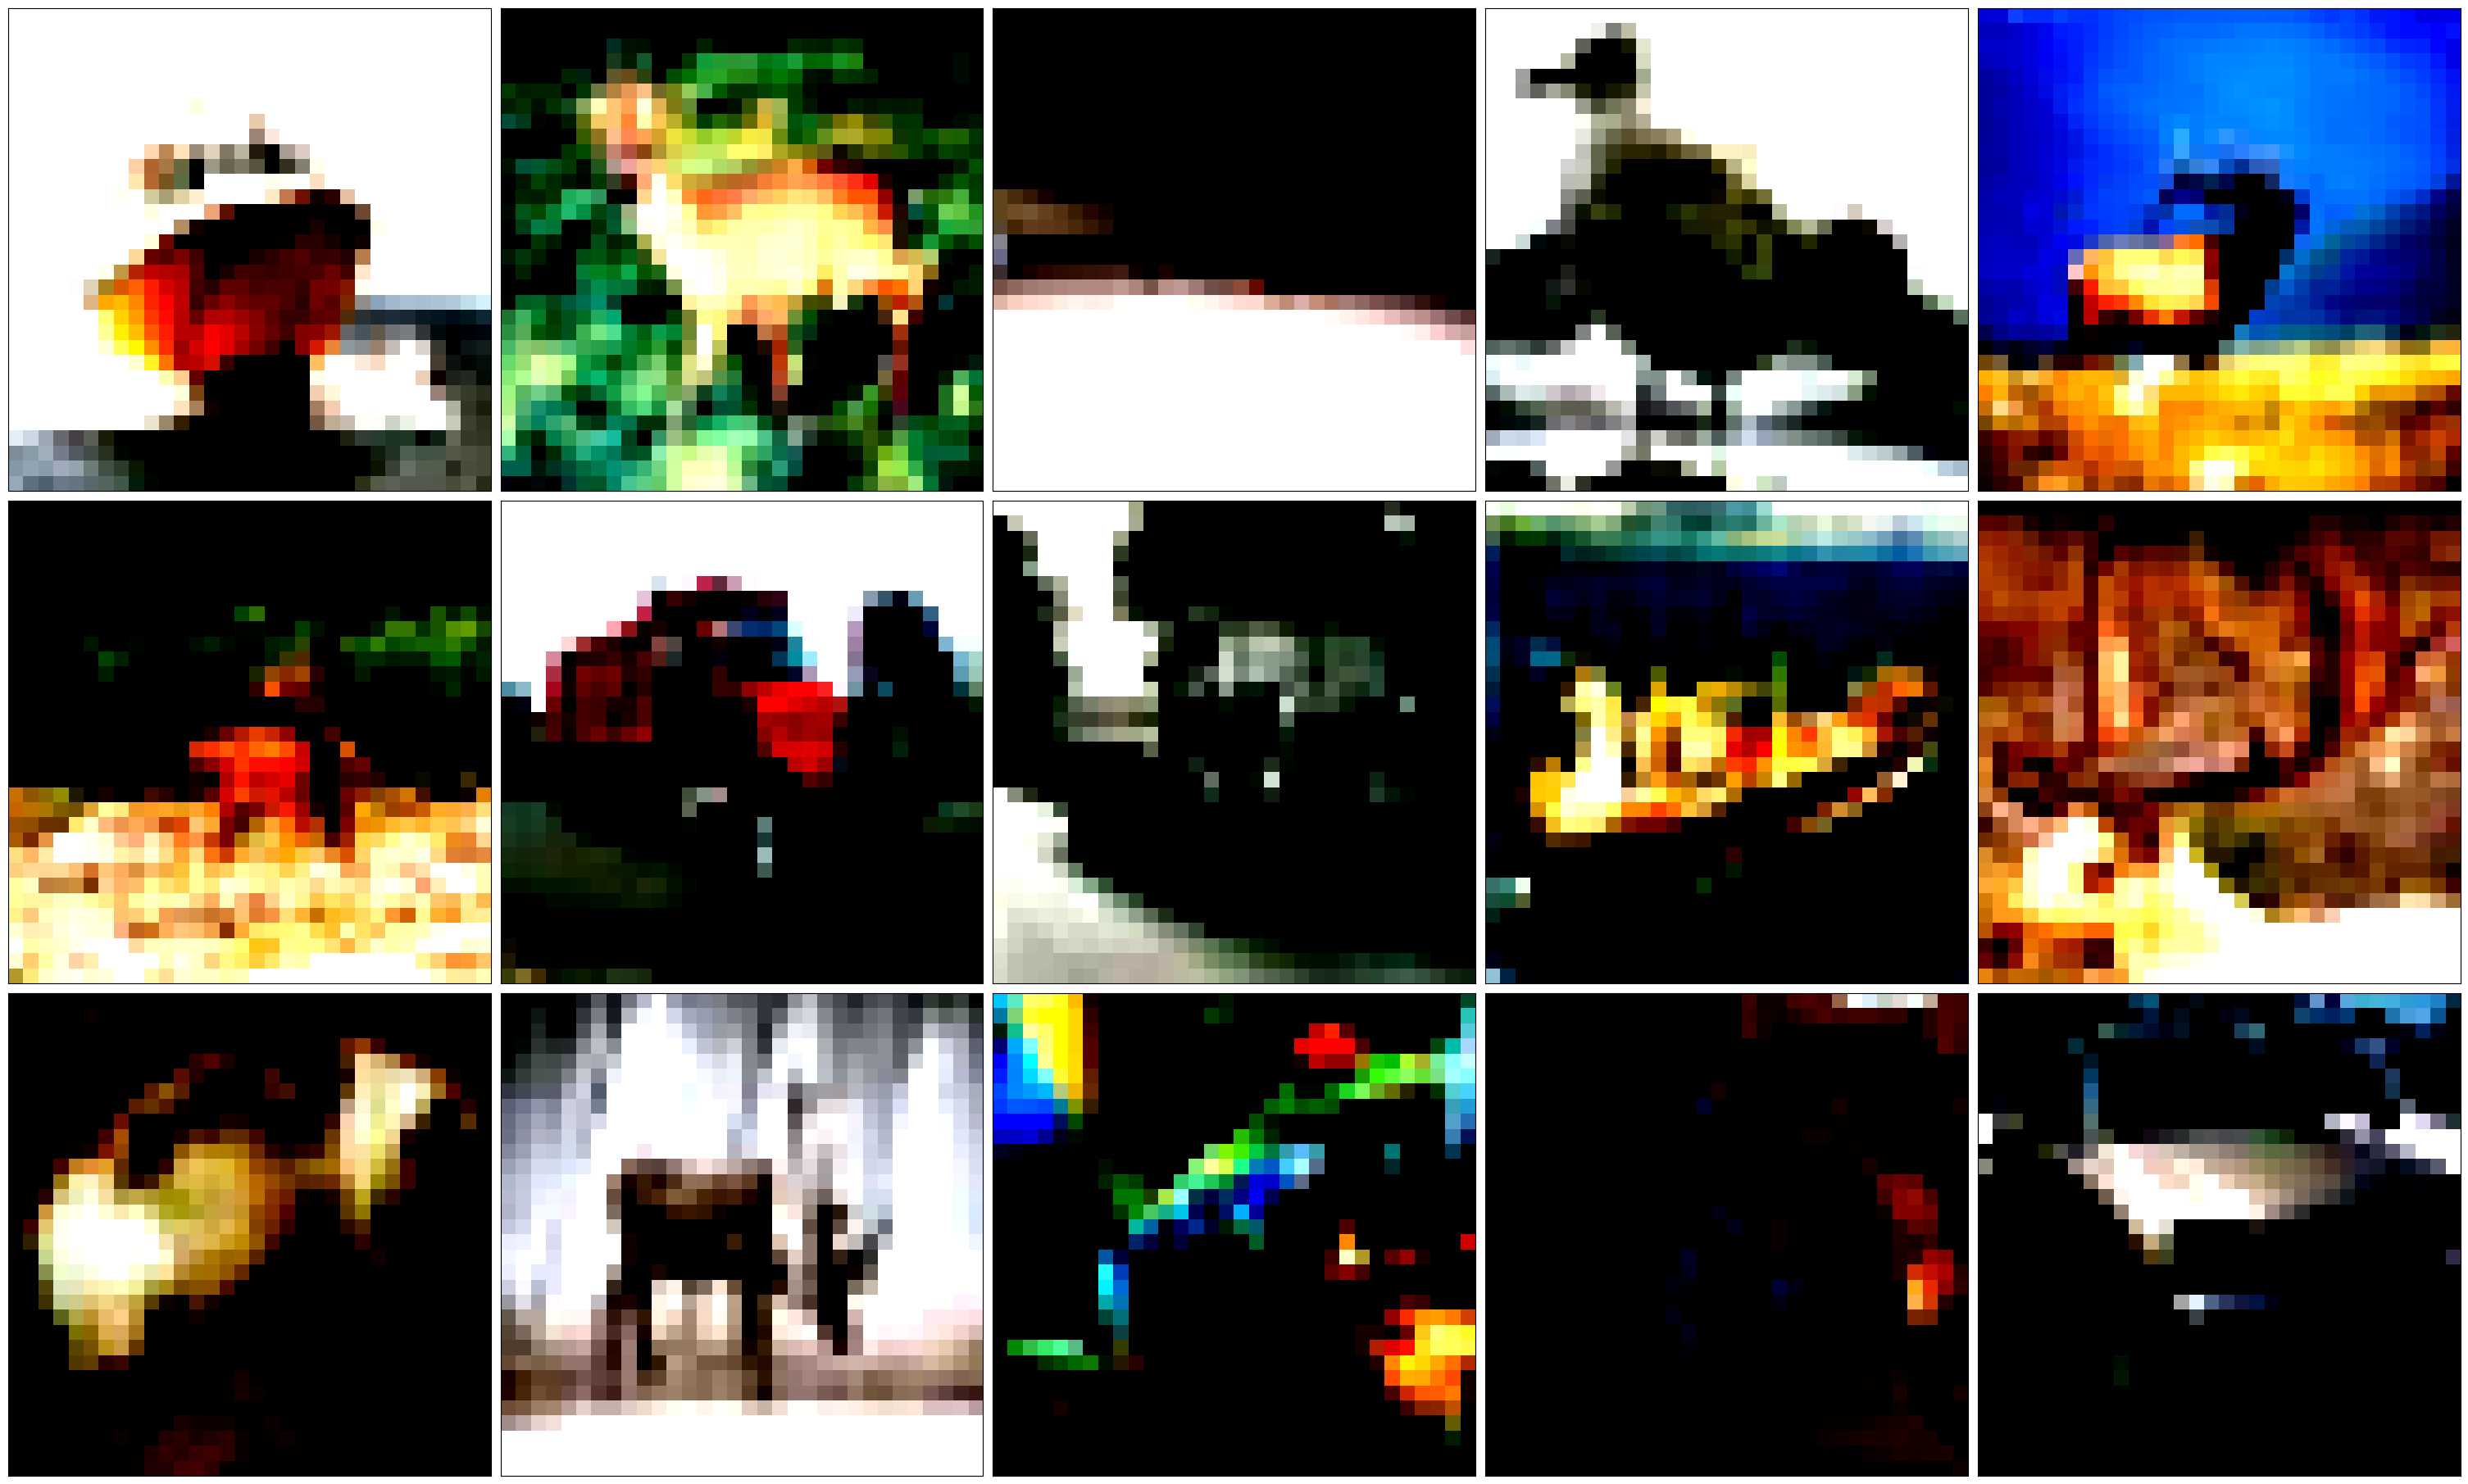

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
 
plt.show()

### 3. Split Data (validation data)

In [5]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print("x_train shape:",x_train.shape)
print("x_valid shape:",x_valid.shape)
print("x_test shape:",x_test.shape)

x_train shape: (45000, 32, 32, 3)
x_valid shape: (5000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### 5. One-Hot Encoding for Labels

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

### Model architecture

![LeNet Architecture](https://raw.githubusercontent.com/abarbierif/python-repo/main/ml/images/vggnet_architecture.png?token=GHSAT0AAAAAACQTVNAESM2GKX2BMJEJIDMSZS2BPLQ)
<center><img src="https://raw.githubusercontent.com/abarbierif/python-repo/main/ml/images/vggnet_architecture.png?token=GHSAT0AAAAAACQTVNAESM2GKX2BMJEJIDMSZS2BPLQ" alt="inception_module" width="600" height="auto"></center>
To implement VGGNet16 (D configuration) in Keras, read the [original paper](http://arxiv.org/pdf/1409.1556v6) and extract the architecture information.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import regularizers

weight_decay = 5e-04

vgg16 = Sequential()

# first block
vgg16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', 
            kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:4]))
vgg16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# second block
vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# third block
vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# forth block
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# fifth block
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# sixth block
vgg16.add(Flatten())
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dropout(rate=0.5))
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dropout(rate=0.5))
#vgg16.add(Dense(1000, activation='softmax'))
vgg16.add(Dense(10, activation='softmax'))

vgg16.summary()

/home/angelo/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

### 7. Compile and Train the model

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

#Gradient descent (with momentum) optimizer
opt = optimizers.SGD(learning_rate=10e-02, momentum=0.9)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5)

checkpointer = ModelCheckpoint(filepath='best_weights/vgg16.model.weights.best.keras', verbose=1, save_best_only=True)

vgg16.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

hist = vgg16.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer, reduce_lr],
              verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 2.42388, saving model to best_weights/vgg16.model.weights.best.keras
1407/1407 - 823s - 585ms/step - accuracy: 0.0993 - loss: 2.9646 - val_accuracy: 0.0972 - val_loss: 2.4239 - learning_rate: 0.1000
Epoch 2/10

Epoch 2: val_loss improved from 2.42388 to 2.32094, saving model to best_weights/vgg16.model.weights.best.keras
1407/1407 - 819s - 582ms/step - accuracy: 0.0974 - loss: 2.3481 - val_accuracy: 0.1010 - val_loss: 2.3209 - learning_rate: 0.1000
Epoch 3/10

Epoch 3: val_loss improved from 2.32094 to 2.30763, saving model to best_weights/vgg16.model.weights.best.keras
1407/1407 - 856s - 609ms/step - accuracy: 0.0999 - loss: 2.3116 - val_accuracy: 0.0996 - val_loss: 2.3076 - learning_rate: 0.1000
Epoch 4/10


KeyboardInterrupt: 